###**Problem Statement**:
DSW (Data Science Wallah) has hired 1000 new employees, the HR has contacted you, and provided you with a text file having new employees’ names. He wants you to help him with generating Employees IDs, Emails, and Password

###Tasks to be performed:
1. Hey buddy, we have hired 1000 new employees. Here are the names in a text file, each name is separated using a new line. Can you generate the following:

 >Employee ID: Starting from 2020001. Example 2020001, 2020002 and so on

 >Email ID: first_name.last_name@dsw.co

 >Password: It should be an alphanumeric value, must having capital letters, small letters, and special symbols

2. I need you to perform some operations on the data, so can we load the data in a Pandas DataFrame

3. Just to cross-check, can you show me the first 2 and the last 3 rows. Also, let’s check the shape of the DataFrame and print the data-types of each column

4. Print the employee id, email id, and password of ‘Nancy Zediker’

5. Can we check if the column ‘Email ID’, it should not contain any duplicate emails, also check its size and print the first 10 values
 > If duplicate email is found, add a number in the duplicated email We have planned to invite them on lunch in batches.

6. Lets create the first batch of all people whose names are starting with ‘A’. Also give me their count

7. I just got to know, that the people at index 10, 130, and 560 will not be joining so please remove their record

8. We also need to share the data with the finance department so can you create a new DataFrame without the password column and save it in an excel file for sharing

9. Can you tell me how I will access the data from excel file using names. For example show me the data for 'John Brown’ and 'Michael Combes’

###Download the text file containing name

In [ ]:
import pandas as pd

In [ ]:
!wget https://www.dropbox.com/s/onl5ac2ea3v11aw/names.txt

--2024-01-04 13:00:15--  https://www.dropbox.com/s/onl5ac2ea3v11aw/names.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.13.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.13.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/onl5ac2ea3v11aw/names.txt [following]
--2024-01-04 13:00:15--  https://www.dropbox.com/s/raw/onl5ac2ea3v11aw/names.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc02593573556acff943392bdd68.dl.dropboxusercontent.com/cd/0/inline/CKvDNWcrUvlHDktpJeqms5CcdDFtPbUsxvsWMdUyklXaUVX4auYiJBCffVpQcDEL7yZih5-F4Cp5rNA-KgK294hYailVLQsVFoc758OuBF44HkrpH_wNmg1VK-ks_zwgk_oYOsGAZr8s0cAwvcJjBDon/file# [following]
--2024-01-04 13:00:16--  https://uc02593573556acff943392bdd68.dl.dropboxusercontent.com/cd/0/inline/CKvDNWcrUvlHDktpJeqms5CcdDFtPbUsxvsWMdUyklXaUVX4auYiJBCffVpQcDEL7yZih5-F4Cp5rNA-KgK294hYailVLQsVFoc758OuBF44H

###**Task 1:**

Read the names, In the text file each name is separated using a new line.
Can you generate the following:
>* Employee ID: Starting from 2020001. Example 2020001, 2020002 …
>* Email ID: first_name.last_name@dsw.co
>* Password: It should be alphanumeric value, must having capital letters, small letters, and special symbols

In [ ]:
file1 = open('/content/names.txt','r')
names = file1.read()
file1.close()

In [ ]:
names = names.strip().split('\n') #strip() is used to remove space around the string.  split() is splitting the string using '\n'
print(names[:10])
len(names)


['Edward Davis', 'John Brown', 'Cristopher Mccrate', 'Michael Combes', 'Jeff Blount', 'Joseph Ferris', 'Pablo Bruner', 'Ronnie Waite', 'Edward Gonzalez', 'Ruby Musetti']


1000

In [ ]:
#importing the required libraries
import pandas as pd
import random
import numpy as np

In [ ]:
sp_symbol = ['#','$','@','?', '&', '!']
def pass_gen():
  #function to generate password
  pwd = []
  caps_alpha = [chr(random.randrange(65, 65+26)) for _ in range(random.randrange(1, 4))]
  small_alpha = [chr(random.randrange(97, 97+26)) for _ in range(random.randrange(3, 6))]
  np.random.shuffle(sp_symbol)
  pwd.append(sp_symbol[0])
  num = [str(random.randrange(0,10)) for _ in range(random.randrange(1, 4)) ]
  pwd = pwd + caps_alpha + small_alpha + num
  np.random.shuffle(pwd)
  pwd = ''.join(pwd)
  return pwd

In [ ]:
print(pass_gen()) #test password generator function

yLJsFg5$


In [ ]:
def email_gen(name):
  name = name.split()
  email = '.'.join(name)
  return email.lower()+'@dsw.co'

In [ ]:
print(email_gen('Abhishek Singh'))

abhishek.singh@dsw.co


In [ ]:
emp_id = [id for id in range(2020001,2020001+1000)]
email = [ email_gen(name) for name in names ]
password = [pass_gen() for _ in range(1000)]

###**Task 2:** Create a pandas DataFrame

First column should contain names

Second column should contain Employee ID

Third column should contain Email ID

Fourth column should contain Password

In [ ]:
df = pd.DataFrame({'Name':names,'Employee ID': emp_id,'Email ID':email, 'Password': password})

####Other ways to create a dataframe

In [ ]:
#creating a dataframe from multi-dimensional array
x = np.array([[90,95,100],[98,100,99]])
df1 = pd.DataFrame(x)
print(df1)
print('type:',type(df))

    0    1    2
0  90   95  100
1  98  100   99
type: <class 'pandas.core.frame.DataFrame'>


In [ ]:
#creating a dataframe from a list of dictionaries
x = [{'Abhi':90,'Ankit':95,'Atul':100},{'Abhi':98,'Atul':99,'Ankit':100}]
df2 = pd.DataFrame(x,index = ['Maths','Physics'])
print(df2)

         Abhi  Ankit  Atul
Maths      90     95   100
Physics    98    100    99


###Task 3:
>* Print the first 2 and last 3 rows
>* Print the shape
>* Print the data-types of each column


In [ ]:
df2.head(2) #by default it will print 5 lines

,Abhi,Ankit,Atul
Maths,90,95,100
Physics,98,100,99


In [ ]:
df2.tail(3)

,Abhi,Ankit,Atul
Maths,90,95,100
Physics,98,100,99


In [ ]:
print('type: ',type(df2))
print('shape of the dataframe:',df2.shape)
df2.dtypes

type:  <class 'pandas.core.frame.DataFrame'>
shape of the dataframe: (2, 3)


Abhi     int64
Ankit    int64
Atul     int64
dtype: object

shape (1000 , 4) means 1000 rows and 4 columns

###Task 4: Print the employee id, email id, and password of 'Nancy Zediker'

In [ ]:
df[df['Name']=='Nancy Zediker'] #fetching data from the dataframe for the name Nancy Zediker

,Name,Employee ID,Email ID,Password
998,Nancy Zediker,2020999,nancy.zediker@dsw.co,806tzp@Nmp


###Working with Series
###Task 5:
>* Select the column 'Email ID'
>* Check the size of the column and print its first 10 values
>* Check for duplicate emails
>* If duplicate emails add a number to the next number

In [ ]:
print(df['Email ID'].head()) #selecting a column
print('type: ',type(df['Email ID'])) # A column is a pandas Series
print('Size of the column:',df['Email ID'].size)
print(df['Email ID'].values[:10]) #returns the list of values from the series

0          edward.davis@dsw.co
1            john.brown@dsw.co
2    cristopher.mccrate@dsw.co
3        michael.combes@dsw.co
4           jeff.blount@dsw.co
Name: Email ID, dtype: object
type:  <class 'pandas.core.series.Series'>
Size of the column: 1000
['edward.davis@dsw.co' 'john.brown@dsw.co' 'cristopher.mccrate@dsw.co'
 'michael.combes@dsw.co' 'jeff.blount@dsw.co' 'joseph.ferris@dsw.co'
 'pablo.bruner@dsw.co' 'ronnie.waite@dsw.co' 'edward.gonzalez@dsw.co'
 'ruby.musetti@dsw.co']


In [ ]:
#duplicated method of pandas series can be used to find duplicate values in the Series
df['Email ID'].duplicated() #returns a boolean

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Email ID, Length: 1000, dtype: bool

In [ ]:
df['Email ID'].duplicated().any() #any() method returns True if there are one or more True

True

We can see there are some duplicate values

In [ ]:
#Finding the duplicate value except the first occurence
df[df['Email ID'].duplicated()]  #Boolean Indexing

,Name,Employee ID,Email ID,Password
850,Lois Thompson,2020851,lois.thompson@dsw.co,Hq2vhwY82J#


In [ ]:
df[df['Name']=='Lois Thompson'] #Checking where else Lois Thompson is occuring

,Name,Employee ID,Email ID,Password
598,Lois Thompson,2020599,lois.thompson@dsw.co,Kr4szm#F5B
850,Lois Thompson,2020851,lois.thompson@dsw.co,Hq2vhwY82J#


In [ ]:
df.loc[850,'Email ID'] = 'lois.thompson2.edureka.co'

In [ ]:
df.iloc[850]

Name                       Lois Thompson
Employee ID                      2020851
Email ID       lois.thompson2.edureka.co
Password                     Hq2vhwY82J#
Name: 850, dtype: object

###Task 6: Find all the employees whose name starts with 'A'

Also print the total number of names starting with 'A'

In [ ]:
#Names starting with 'A'
x = df[df['Name'].str.startswith('A')] #boolean indexing
print(x.head())
print("The total number of names starting with 'A' are:",x.size) #total number of names starting with 'A'

               Name  Employee ID               Email ID    Password
23       Alfredo Yu      2020024      alfredo.yu@dsw.co  Cisz6x1e&5
68   Ashley Nettles      2020069  ashley.nettles@dsw.co   49fj&iUnr
77     Alice Vallee      2020078    alice.vallee@dsw.co    6kap7MV#
96   Adrienne Huber      2020097  adrienne.huber@dsw.co  rOh!27DrR9
113     Ahmad Olson      2020114     ahmad.olson@dsw.co    7CFt!xRc
The total number of names starting with 'A' are: 248


###Task 7: Remove the details of those people who are not going to join. They are at 10,130,560

In [ ]:
df.iloc[[10,130,560]]

,Name,Employee ID,Email ID,Password
10,Della Janek,2020011,della.janek@dsw.co,kwSbad@Z8
130,William Ponyah,2020131,william.ponyah@dsw.co,Up7oPt6#p6
560,Joseph Brussel,2020561,joseph.brussel@dsw.co,Rrl6ski&


In [ ]:
df.drop([10,130,560],inplace=True) #inplace=True means make the change in-place, dont return a new dataframe
#drop() method is used to delete rows and columns, by default axis = 0, which means delete row-wise

In [ ]:
df.shape

(997, 4)

We can see 3 people's data has been removed

### Task 8: Also create a new dataframe without password column and save it in an excel file

In [ ]:
public_df = df.drop('Password',axis=1) #Deletes the column ‘Password’, axis=1 represents delete the column, by default axis is 0 meaning row deletion
public_df.head()

,Name,Employee ID,Email ID
0,Edward Davis,2020001,edward.davis@dsw.co
1,John Brown,2020002,john.brown@dsw.co
2,Cristopher Mccrate,2020003,cristopher.mccrate@dsw.co
3,Michael Combes,2020004,michael.combes@dsw.co
4,Jeff Blount,2020005,jeff.blount@dsw.co


###Task 10: Save the dataframe in an excel file

In [ ]:
public_df.to_excel('public_emp_data.xlsx',index=False)
df.to_excel('emp_id.xlsx',index=False)

###Task 11: Read the excel file in a dataframe with names as indexes

In [ ]:
data = pd.read_excel('/content/emp_id.xlsx',index_col='Name')

In [ ]:
data.head()

,Employee ID,Email ID,Password
Name,,,
Edward Davis,2020001,edward.davis@dsw.co,Z#HE4qjopa
John Brown,2020002,john.brown@dsw.co,rB6VH6y1?k
Cristopher Mccrate,2020003,cristopher.mccrate@dsw.co,2fkc!PiSL
Michael Combes,2020004,michael.combes@dsw.co,9jh?Rq
Jeff Blount,2020005,jeff.blount@dsw.co,L4n#3PrqI1


Select rows using index labels

In [ ]:
print(data.loc['John Brown']) #Selecting rows using label
data.loc[['John Brown','Michael Combes']]

Employee ID              2020002
Email ID       john.brown@dsw.co
Password              rB6VH6y1?k
Name: John Brown, dtype: object


,Employee ID,Email ID,Password
Name,,,
John Brown,2020002,john.brown@dsw.co,rB6VH6y1?k
Michael Combes,2020004,michael.combes@dsw.co,9jh?Rq


####Additional task: Generating a list of 1000 names and writing it in a file
In case you are wondering how to a file with 1000 names

In [ ]:

!pip install names
import names


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 789.1/789.1 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for names: filename=names-0.3.0-py3-none-any.whl size=803682 sha256=4ffc2ebb99497583e7faefcbc4423ee7fe20a74e01ee4cbf514c0bc2074624d2
  Stored in directory: /root/.cache/pip/wheels/fc/9a/6f/78f4282bbcaa2d8c678b73c54c0bb1b7a04009f0d7cec79fce
Successfully built names


In [ ]:
names = [names.get_full_name() for _ in range(1000)]

In [ ]:

file1 = open('names.txt','w')
for n in names:
  file1.write(n+'\n')
file1.close()

##**Other Pandas Functionalities**

###Demo: Analysis of the titanic dataset


**Features' Description:**

>survival:	Survival

>pclass:	Ticket class

>sex:	Sex

>Age:	Age in years

>sibsp:	Number of siblings / spouses aboard the Titanic

>parch:	Number of parents / children aboard the Titanic

>ticket:	Ticket number

>fare:	Passenger fare

>cabin:	Cabin number

>embarked:	Port of Embarkation

#1. Loading Data:
**Description**: Load the Titanic dataset into a Pandas DataFrame.


In [ ]:
import pandas as pd

# Load the Titanic dataset from a CSV file
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#2. Basic Information:
**Description**: Get basic information about the DataFrame.

In [ ]:
# Display basic information about the DataFrame
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#3. Summary Statistics:
**Description**: Generate descriptive statistics of the dataset.

In [ ]:
# Display summary statistics of the DataFrame
summary_stats = titanic.describe()
summary_stats

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#4. Handling Missing Values:
**Description**: Identify and handle missing values in the dataset.

In [ ]:
# Check for missing values
missing_values = titanic.isnull().sum()
print(missing_values)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Handle missing values (e.g., fill with mean)
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

#5. Filtering Data:
**Description**: Select specific rows or columns based on conditions.

In [ ]:
# Filter passengers with age greater than 30
adults = titanic[titanic['Age'] > 30]

adults


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [ ]:
# Select specific columns
selected_columns = titanic[['Survived', 'Pclass', 'Sex']]
selected_columns

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male
...,...,...,...
886,0,2,male
887,1,1,female
888,0,3,female
889,1,1,male


#6. GroupBy:
**Description**: Group data based on one or more columns.

In [ ]:
# Group by 'pclass' and calculate the mean of each group
class_grouped = titanic.groupby('Pclass').mean()
class_grouped

<ipython-input-98-b08e2d519cdd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class_grouped = titanic.groupby('Pclass').mean()


,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,37.048118,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.866958,0.402174,0.380435,20.662183
3,439.154786,0.242363,26.403259,0.615071,0.393075,13.675550


#. Advanced GroupBy Operations:
**Description**: Explore more advanced groupby operations.

In [ ]:
# Group by 'pclass' and 'sex', and calculate the median age for each group
class_sex_grouped = titanic.groupby(['Pclass', 'Sex']).median()
class_sex_grouped


<ipython-input-99-cbf9af7a191c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  class_sex_grouped = titanic.groupby(['Pclass', 'Sex']).median()


PassengerId  Survived        Age  SibSp  Parch      Fare
Pclass Sex                                                             
1      female        447.0       1.0  32.500000    0.0    0.0  82.66455
       male          480.5       0.0  36.000000    0.0    0.0  41.26250
2      female        439.5       1.0  28.500000    0.0    0.0  22.00000
       male          416.5       0.0  29.699118    0.0    0.0  13.00000
3      female        376.0       0.5  28.000000    0.0    0.0  12.47500
       male          466.0       0.0  29.699118    0.0    0.0   7.92500

In [ ]:
# Count the number of passengers in each class
class_counts = titanic['Pclass'].value_counts()
class_counts

3    491
1    216
2    184
Name: Pclass, dtype: int64

#7. Sorting Data:
**Description**: Sort DataFrame based on specific columns.

In [ ]:
# Sort DataFrame by 'age' in descending order
sorted_data = titanic.sort_values(by='Age', ascending=False)
sorted_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.00,0,0,PC 17754,34.6542,A5,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C
116,117,0,3,"Connors, Mr. Patrick",male,70.50,0,0,370369,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S


#8. Data Visualization:
**Description**: Visualize data using plots (requires additional library, e.g., Matplotlib or Seaborn).

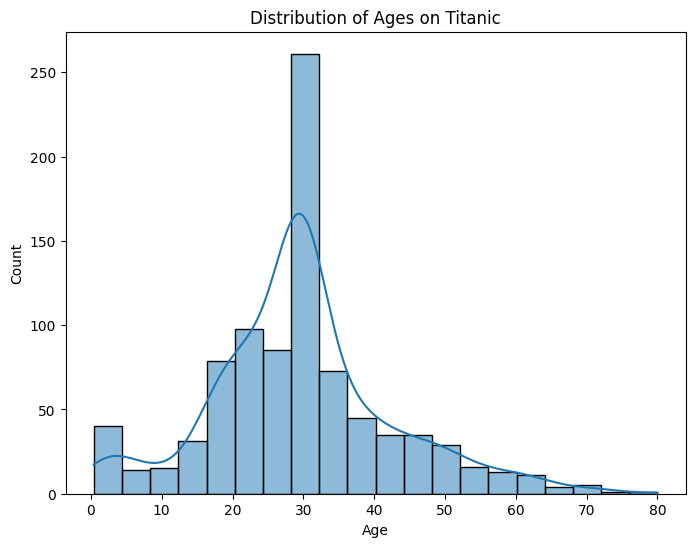

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of ages
plt.figure(figsize=(8, 6))
sns.histplot(titanic['Age'], bins=20, kde=True)
plt.title('Distribution of Ages on Titanic')
plt.show()


#9. Slicing Rows and Columns:
**Description**: Slice specific rows and columns from the DataFrame.

In [ ]:
# Select rows 10 to 20 and columns 'survival' and 'sex'
sliced_data = titanic.loc[10:20, ['Survived', 'Sex']]
sliced_data

,Survived,Sex
10,1,female
11,1,female
12,0,male
13,0,male
14,0,female
15,1,female
16,0,male
17,1,male
18,0,female
19,1,female


#10. Multiple Conditions (AND, OR):
**Description**: Use multiple conditions to filter data.

In [ ]:
# Filter passengers who are female and survived
female_survivors = titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1)]
female_survivors

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


#11.Creating New Columns:
**Description**: Add new columns based on existing data.

In [ ]:
# Create a new column 'family_size' by adding 'sibsp' and 'parch'
titanic['family_size'] = titanic['SibSp'] + titanic['Parch']
titanic['family_size']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: family_size, Length: 891, dtype: int64

#12. Dropping Columns:
**Description**: Remove unnecessary columns from the DataFrame.

In [ ]:
# Drop the 'cabin' column
titanic = titanic.drop('Cabin', axis=1)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0


#13. Pivot Tables:
**Description**: Create a pivot table to summarize data.

In [ ]:
# Create a pivot table showing the median age for each class and sex
pivot_table = titanic.pivot_table(values='Age', index='Pclass', columns='Sex', aggfunc='median')
pivot_table

Sex,female,male
Pclass,,
1,32.5,36.000000
2,28.5,29.699118
3,28.0,29.699118


#Assignment Tasks:
**Handling Datetime Data**:

Extract the year of birth from the 'dob' (date of birth) column if available.

**Filtering and Aggregating**:

Identify the number of passengers who were alone (no siblings, spouses, parents, or children) and calculate the average fare for this group.

**Handling Categorical Data**:

Convert the 'embarked' column into numerical values using one-hot encoding.

**Data Visualization**:

Create a bar chart showing the survival rates for each class.

**Advanced Slicing**:

Slice the DataFrame to include only passengers who paid a fare greater than $50 and were in the first class.

**Advanced GroupBy**:

Group the data by 'embarked' and 'pclass' and calculate the median age for each group.

**Conditional Updating**:

Update the 'survival' column to 1 for passengers under the age of 10.

**Handling Outliers**:

Identify and handle outliers in the 'fare' column using appropriate techniques (e.g., removing or capping).

**Handling Duplicate Data**:

Check for and remove any duplicate rows in the dataset.

**Working with Text Data**:

Extract the titles (Mr., Mrs., etc.) from the 'name' column and create a new column with these titles.